In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Data_Mining')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_excel('/content/drive/My Drive/Data_Mining/datapemilukpu.xls')

In [ ]:
data.head()

,NAMA PARTAI POLITIK,NAMA CALON LEGESLATIF,JENIS KELAMIN,KECAMATAN,NO.URUT PARPOL,SUARA SAH PARTAI,JUML.PEROLEHAN KURSI,DAERAH PEMILIHAN,NO.URUT CALEG,SUARA SAH CALEG,TERPILIH ATAU TIDAK
0,HATI NURANI RAKYAT,"TOTO SUKISNO,BSc",L,LEBAKSIU,1,18578,1,1,1,594,TIDAK
1,HATI NURANI RAKYAT,"EDI PURYANTO,SH",L,SLAWI,1,18578,1,1,2,943,TIDAK
2,HATI NURANI RAKYAT,"ELI RETNOWATI,SH",P,SLAWI,1,18578,1,1,3,1730,TIDAK
3,HATI NURANI RAKYAT,SAHYUDIN,L,DUKUHWARU,1,18578,1,1,4,2508,YA
4,HATI NURANI RAKYAT,"H.FAJAR SIGIT KUSUMAJAYA,SH",L,SLAWI,1,18578,1,2,1,923,TIDAK


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [ ]:
data.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [6]:
# Hitung jumlah caleg yang terpilih dan tidak terpilih
terpilih_count = data['TERPILIH ATAU TIDAK'].value_counts()

# Hitung rasio kesuksesan
rasio_terpilih = (terpilih_count['YA'] / len(data)) * 100

print(f"Rasio Caleg Terpilih: {rasio_terpilih}%")


Rasio Caleg Terpilih: 11.294117647058824%


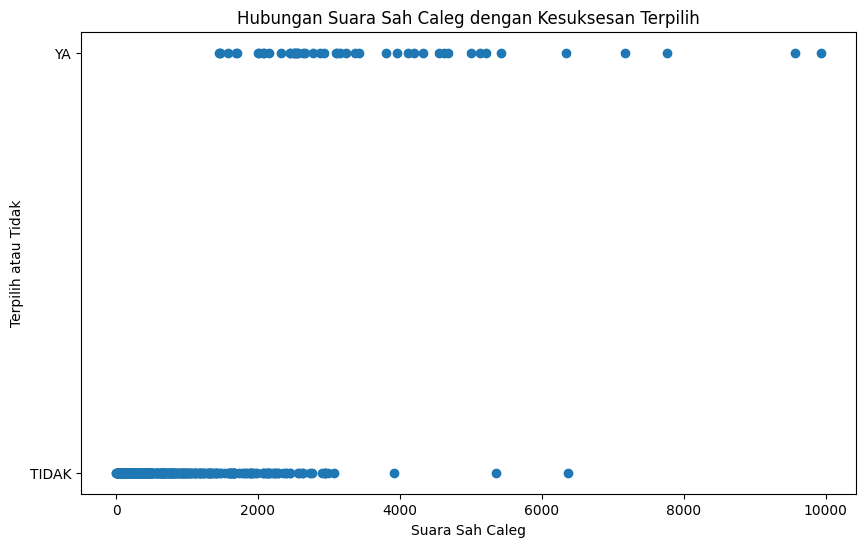

In [11]:
import matplotlib.pyplot as plt

# Scatter plot antara Suara Sah Caleg dan Kesuksesan
plt.figure(figsize=(10, 6))
plt.scatter(data['SUARA SAH CALEG'], data['TERPILIH ATAU TIDAK'])
plt.title('Hubungan Suara Sah Caleg dengan Kesuksesan Terpilih')
plt.xlabel('Suara Sah Caleg')
plt.ylabel('Terpilih atau Tidak')
plt.show()


In [12]:
# Hitung jumlah caleg terpilih per partai
partai_kinerja = data[data['TERPILIH ATAU TIDAK'] == 'YA'].groupby('NAMA PARTAI POLITIK').size()

# Tampilkan hasil
print(partai_kinerja)


NAMA PARTAI POLITIK
HATI NURANI RAKYAT                        1
PARTAI AMANAT NASIONAL                    5
PARTAI BURUH                              1
PARTAI DEMOKRASI INDONESIA PERJUANGAN    13
PARTAI DEMOKRAT                           6
PARTAI GERINDRA                           1
PARTAI GOLONGAN KARYA                     6
PARTAI KEADILAN SEJAHTERA                 5
PARTAI KEBANGKITAN BANGSA                 8
PARTAI PERSATUAN PEMBANGUNAN              2
dtype: int64


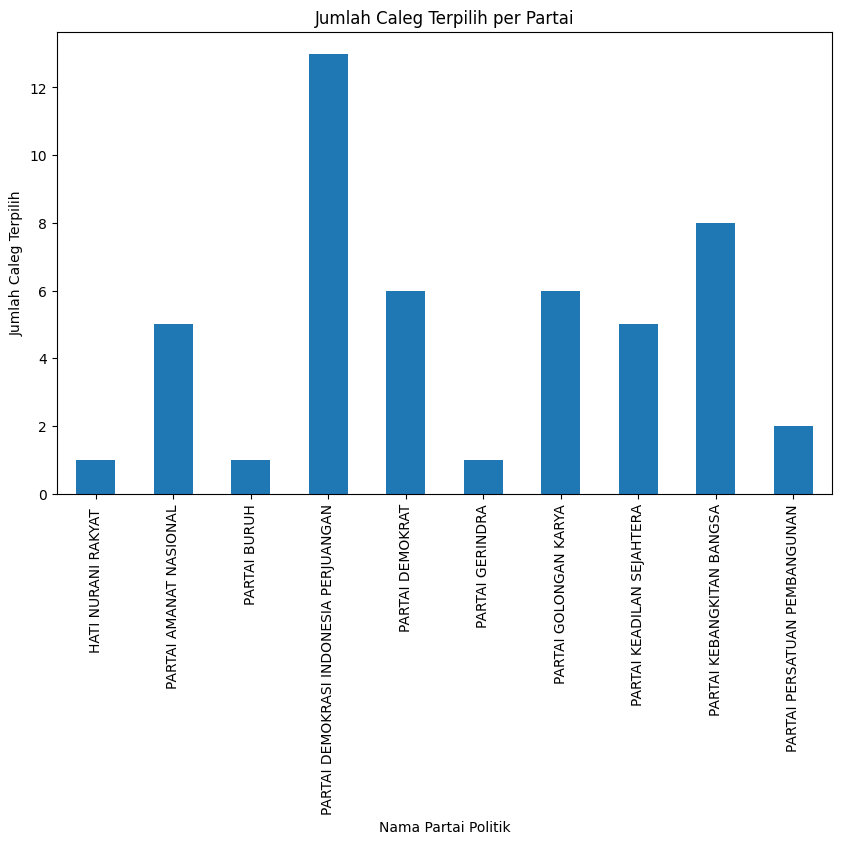

In [13]:
# Bar chart kinerja partai
partai_kinerja.plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Caleg Terpilih per Partai')
plt.xlabel('Nama Partai Politik')
plt.ylabel('Jumlah Caleg Terpilih')
plt.show()


In [39]:
# Cek nilai maksimum dari kolom 'SUARA SAH CALEG'
max_suara = data['SUARA SAH CALEG'].max()
print(f"Nilai maksimum suara sah caleg: {max_suara}")

# Buat bins sesuai dengan rentang nilai maksimum
# Pastikan bins selalu naik secara monotonik
bins = [0, 1000, 5000, 10000, 15000]  # Ganti nilai terakhir dengan nilai yang lebih besar dari max_suara
labels = ['0-1000', '1000-5000', '5000-10000', '10000-15000'] # Sesuaikan label dengan bins

# Tampilkan bins dan labels untuk debug
print("Bins yang digunakan:", bins)
print("Labels yang digunakan:", labels)

# Mengelompokkan suara ke dalam beberapa kategori
data['KATEGORI SUARA'] = pd.cut(data['SUARA SAH CALEG'], bins=bins, labels=labels, include_lowest=True)

# Analisis berapa banyak yang terpilih berdasarkan kategori suara
terpilih_kategori = data.groupby(['KATEGORI SUARA', 'TERPILIH ATAU TIDAK']).size().unstack()

# Tampilkan hasil
print(terpilih_kategori)

Nilai maksimum suara sah caleg: 9925
Bins yang digunakan: [0, 1000, 5000, 10000, 15000]
Labels yang digunakan: ['0-1000', '1000-5000', '5000-10000', '10000-15000']
TERPILIH ATAU TIDAK  TIDAK  YA
KATEGORI SUARA                
0-1000                 279   0
1000-5000               96  39
5000-10000               2   9
10000-15000              0   0


<ipython-input-39-093d593d69da>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terpilih_kategori = data.groupby(['KATEGORI SUARA', 'TERPILIH ATAU TIDAK']).size().unstack()
